# Converting Raw JSON data to CSV file for use in model implementation.

In [ ]:
import csv
import json
from datetime import datetime
from dateutil import parser


fw_access_layers_data = open('/content/out_bins.json', 'r')
fw_access_layers_parsed = json.loads(fw_access_layers_data.read())
with open("bin.csv", "w+") as outfile:
    f = csv.writer(outfile)
    f.writerow(["id", "type", "FillPercentage", "Battery", "eventDate", "updateState","Distance"])
    for i in range(16801):
      dt =  fw_access_layers_parsed['data'][i]['request']['eventDate']
      date_object = parser.parse(dt)
      fw_access_layers_parsed['data'][i]['request']['eventDate'] = date_object.date()
      f.writerow([fw_access_layers_parsed['data'][i]['id'], fw_access_layers_parsed['data'][i]['type'],
                  fw_access_layers_parsed['data'][i]['request']['measurements']['FillPercentage'],
                  fw_access_layers_parsed['data'][i]['request']['measurements']['battery'],
                  fw_access_layers_parsed['data'][i]['request']['eventDate'],
                  fw_access_layers_parsed['data'][i]['request']['updateState'],
                  fw_access_layers_parsed['data'][i]['Distance']])

# Data Understanding

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import datetime, pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels.api as sm


In [ ]:
# from google.colab import files
# uploaded = files.upload()
# import io
# data= pd.read_csv(io.StringIO(uploaded['bin.csv'].decode('utf-8'))) # to read csv file from local directory
data =pd.read_csv('/content/bin.csv') #csv file generated is read using pandas library
data.head()

,id,type,FillPercentage,Battery,eventDate,updateState,Distance
0,5c2bf397530484f84463,Fill level,70,56,2018-09-25,True,798
1,5c2bf397530484f84463,Fill level,70,56,2018-09-25,True,800
2,5c2bf397530484f84463,Fill level,69,56,2018-09-25,True,804
3,5c2bf397530484f84463,Fill level,79,56,2018-09-25,True,613
4,5c2bf397530484f84463,Fill level,70,56,2018-09-25,True,792


In [ ]:
data.info() #summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16801 entries, 0 to 16800
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16801 non-null  object
 1   type            16801 non-null  object
 2   FillPercentage  16801 non-null  int64 
 3   Battery         16801 non-null  int64 
 4   eventDate       16801 non-null  object
 5   updateState     16801 non-null  bool  
 6   Distance        16801 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 804.1+ KB


In [ ]:
data.isnull().sum() #data is checked for null or missing values

id                0
type              0
FillPercentage    0
Battery           0
eventDate         0
updateState       0
Distance          0
dtype: int64

In [ ]:
data['eventDate'] = pd.to_datetime(data['eventDate']) #converting the eventDate attribute of the dataset datetime to use in time series forecasting.

In [ ]:
df = data.set_index('eventDate') #dataframe by "eventDate" as data index, i.e indexed by date

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['FillPercentage'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -4.330653
p-value                            0.000393
#Lags Used                        26.000000
Number of Observations Used    16774.000000
Critical Value (1%)               -3.430740
Critical Value (5%)               -2.861712
Critical Value (10%)              -2.566862
dtype: float64


# Exploratory Data Analysis(EDA)

**Average FillPercentage of waste by Date**

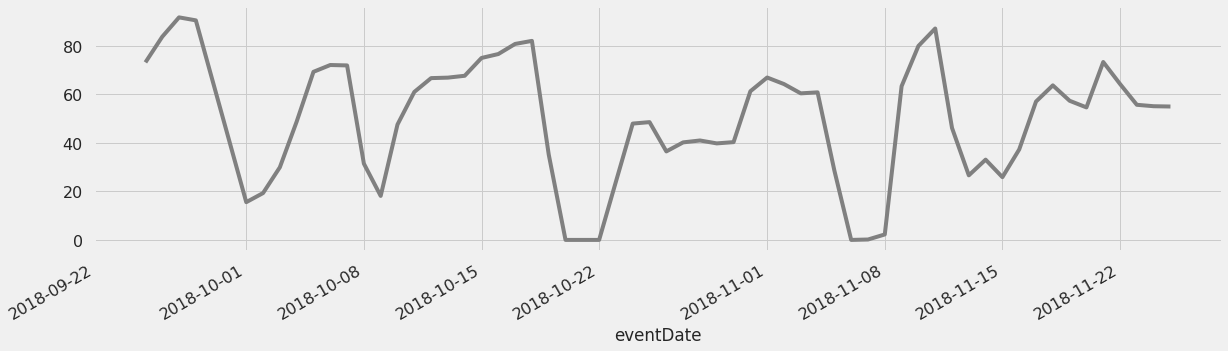

In [ ]:
plt.style.use('fivethirtyeight')
data.groupby('eventDate')['FillPercentage'].mean().plot(figsize=(18, 5), color='grey')

**Average Battery Percentage by Date**

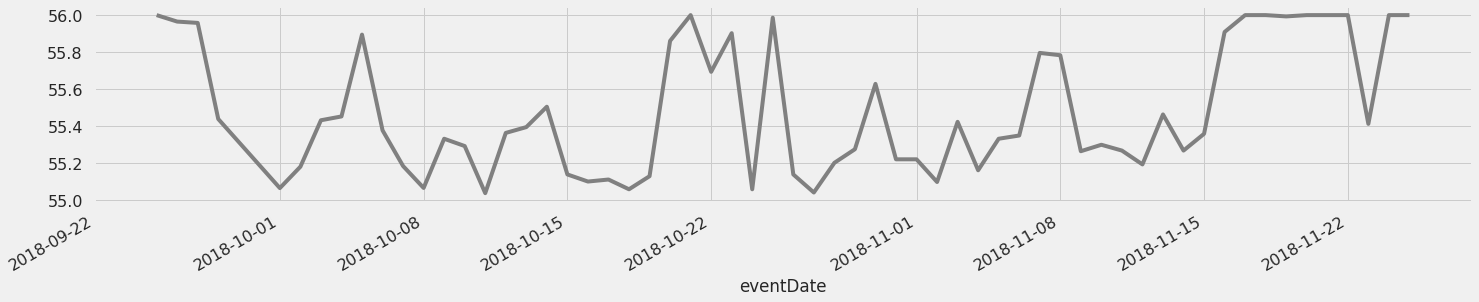

In [ ]:
plt.style.use('fivethirtyeight')
data.groupby('eventDate')['Battery'].mean().plot(figsize=(22, 4), color='grey')

**Average Battery Percentage for Waste FillLevels**

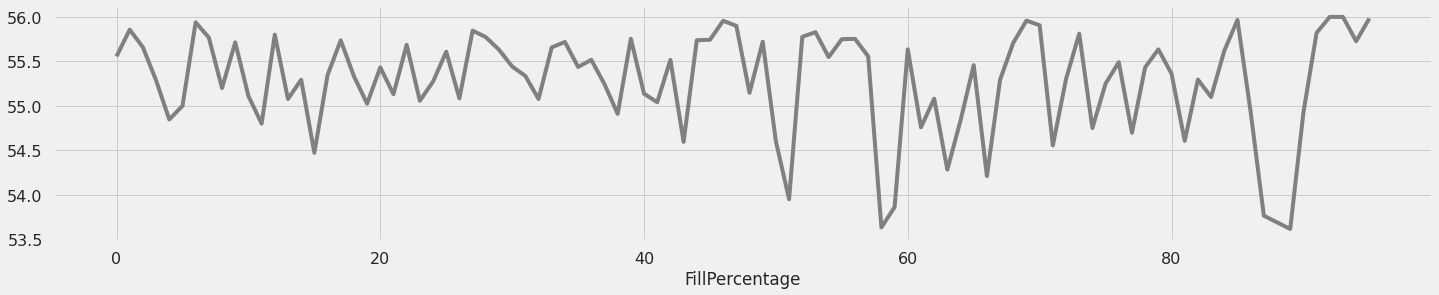

In [ ]:
plt.style.use('fivethirtyeight')
data.groupby('FillPercentage')['Battery'].mean().plot(figsize=(22, 4), color='grey')

**Trend of Waste Fill Percentage by Date**

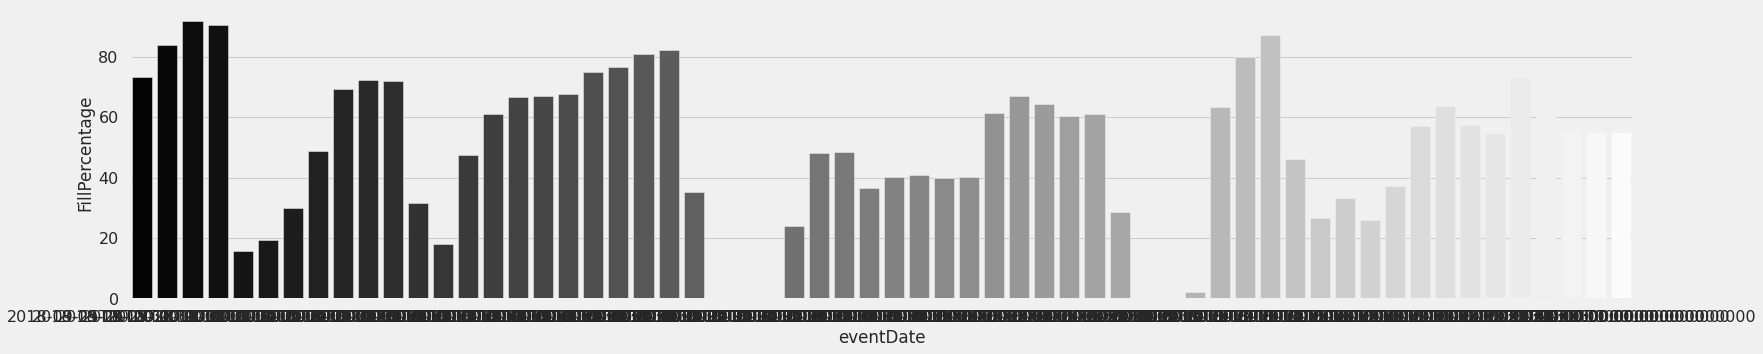

In [ ]:
plt.style.use('fivethirtyeight')
cg = data.groupby('eventDate', as_index=False)['FillPercentage'].mean()
plt.figure(figsize=(24, 5))
sns.barplot(data=cg, x='eventDate', y='FillPercentage', palette='gray')

**Trend of Battery Levels of Waste Bins by FillLevels**

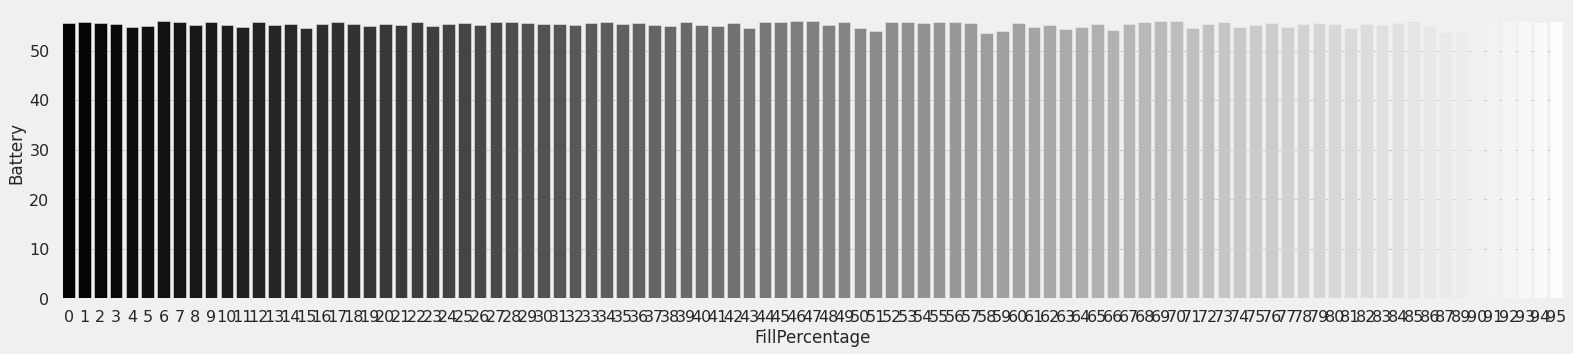

In [ ]:
plt.style.use('fivethirtyeight')
cg = data.groupby('FillPercentage', as_index=False)['Battery'].mean()
plt.figure(figsize=(24, 5))
sns.barplot(data=cg, x='FillPercentage', y='Battery', palette='gray')

In [ ]:
data.FillPercentage.describe() #summary of "FillPercentage" attribute

count    16801.000000
mean        49.323552
std         28.042900
min          0.000000
25%         33.000000
50%         55.000000
75%         69.000000
max         95.000000
Name: FillPercentage, dtype: float64

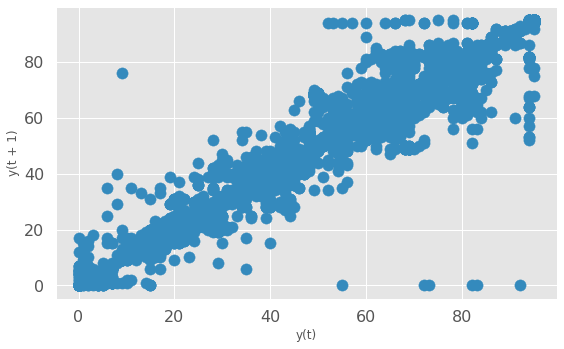

In [ ]:
plt.style.use('ggplot') #Plot Plots for FillPercentage values
plt.figure(figsize=(8, 5))
pd.plotting.lag_plot(data['FillPercentage'], lag=1)

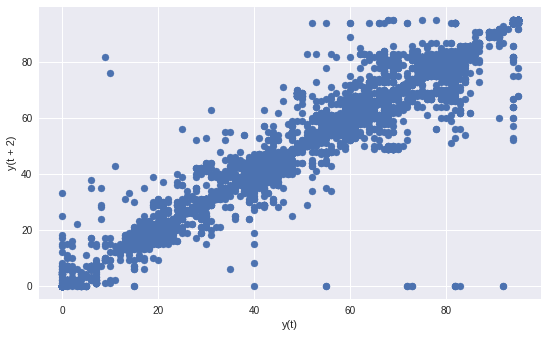

In [ ]:
sns.set()  #Plot Plots for FillPercentage values using seaborn style
plt.style.use('seaborn')
plt.figure(figsize=(8, 5))
pd.plotting.lag_plot(data['FillPercentage'], lag=2)

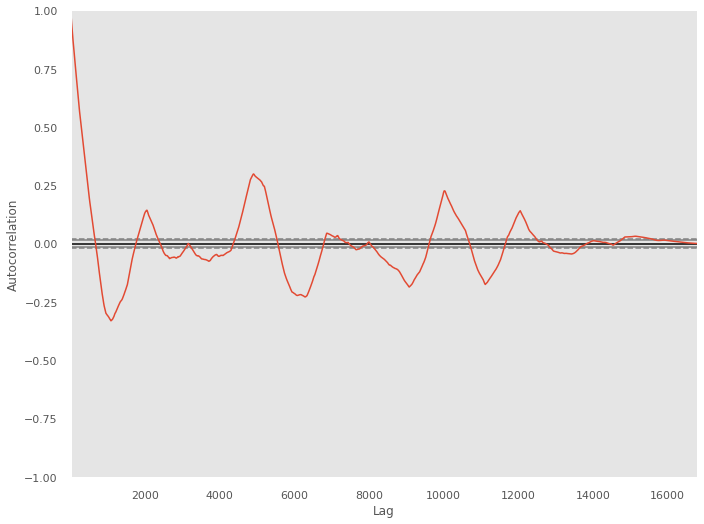

In [ ]:
sns.set() #Plot for autocorrelation 
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
pd.plotting.autocorrelation_plot(data['FillPercentage']) 

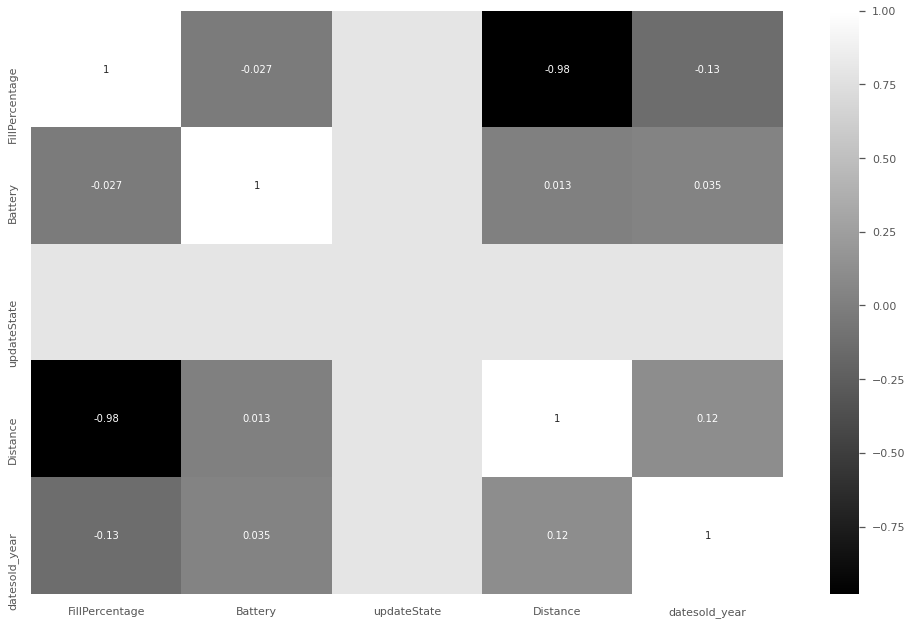

In [ ]:
plt.figure(figsize=(15, 10)) #heatmap to check correlation of various data attributes
sns.heatmap(data.corr(), annot=True, cmap='gray')

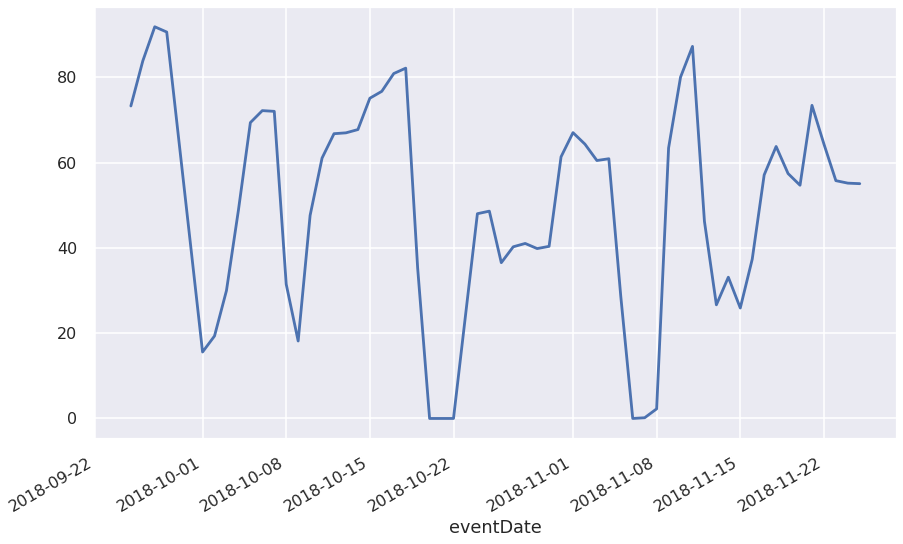

In [ ]:
data.groupby(['eventDate']).FillPercentage.mean().plot() #plot for mean Fillpercenatge value